## Example of the `aitlas` toolbox in the context of crop type prediction

This notebook shows a sample implementation for crop type prediction using the `aitlas` toolbox and the Netherlands 2019 dataset.

In [2]:
import os

from aitlas.datasets import EOPatchCrops
from aitlas.models import LSTM
from aitlas.visualizations import display_eopatch_predictions

### Load the dataset

In [ ]:
dataset_config = {
    "root": "/home/dkocev/data/CropTypeNetherlands/2019/",
    "csv_file_path": "index.csv",
    "batch_size": 128,
    "shuffle": True,
    "num_workers": 4,
    "regions":["train", "test", "val",],
}
dataset = EOPatchCrops(dataset_config)

### Visualize sample time series from the dataset

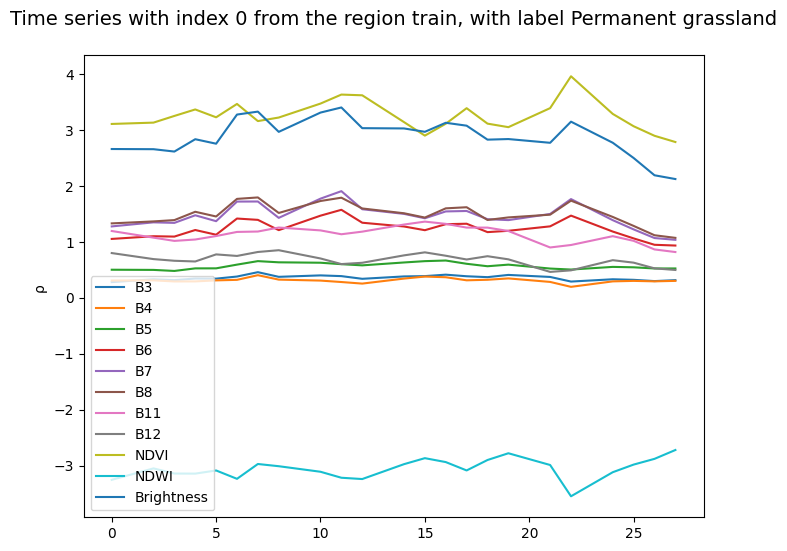

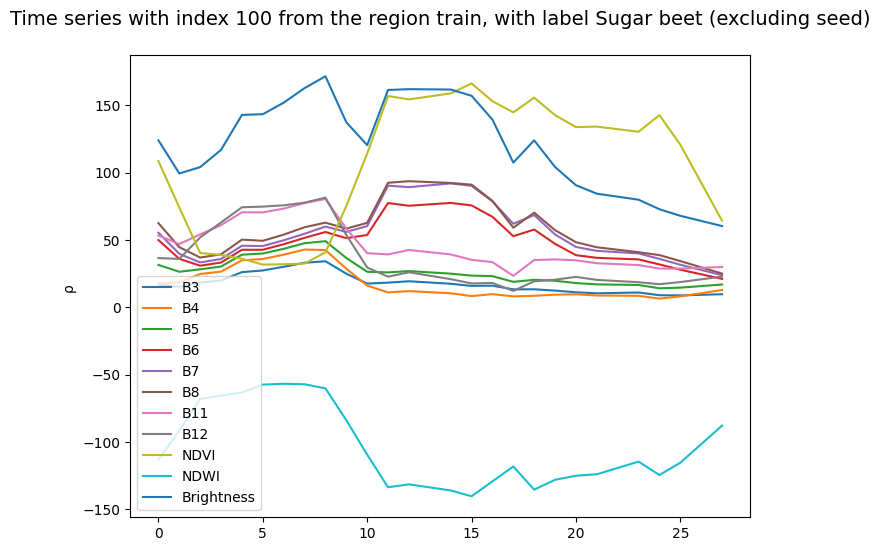

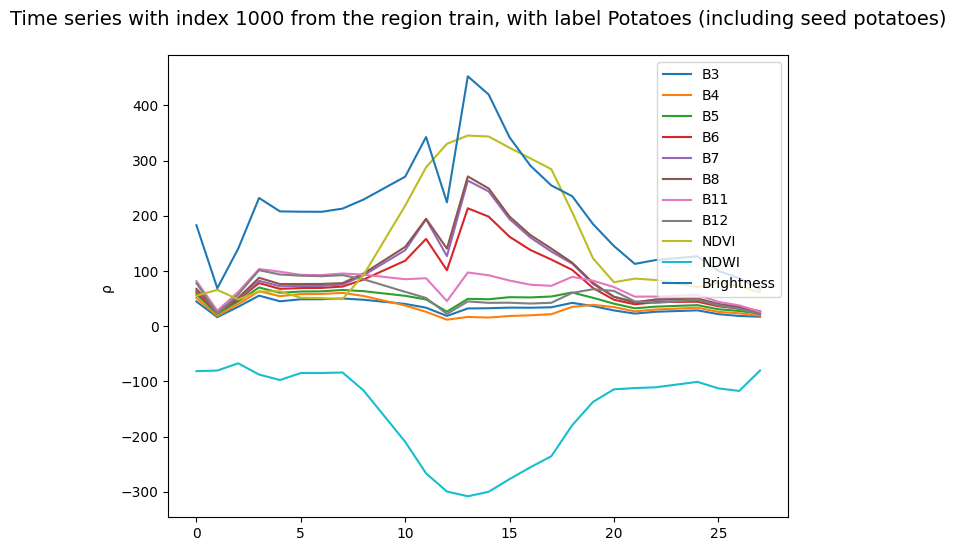

In [9]:
fig1 = dataset.show_timeseries(0)
fig2 = dataset.show_timeseries(100)
fig3 = dataset.show_timeseries(1000)

### Inspect the data

In [10]:
dataset.show_samples()

,id,path,eopatch,polygon_id,CODE_CULTU,sequencelength,classid,classname,region
0,0,eopatch_11173/1666071,eopatch_11173,1666071,J0000,0,0,Permanent grassland,train
1,1,eopatch_10137/1894170,eopatch_10137,1894170,J0000,0,0,Permanent grassland,train
2,2,eopatch_6711/1875243,eopatch_6711,1875243,J0000,0,0,Permanent grassland,train
3,3,eopatch_6590/1924836,eopatch_6590,1924836,G1000,0,1,Temporary grasses and grazings,train
4,4,eopatch_3731/2150854,eopatch_3731,2150854,NUAA+WA+FA9,0,6,Other farmland,train
5,5,eopatch_939/2018637,eopatch_939,2018637,NUAA+WA+FA9,0,6,Other farmland,train
6,6,eopatch_3999/1573533,eopatch_3999,1573533,G3000,0,2,Green maize,train
7,7,eopatch_9569/1709233,eopatch_9569,1709233,J0000,0,0,Permanent grassland,train
8,8,eopatch_2152/2286699,eopatch_2152,2286699,NUAA+WA+FA9,0,6,Other farmland,train
9,9,eopatch_10867/1620648,eopatch_10867,1620648,J0000,0,0,Permanent grassland,train


In [11]:
dataset.data_distribution_table()

,Label,Region,Number of parcels
0,Common winter wheat and spelt,test,3152
1,Common winter wheat and spelt,train,15467
2,Common winter wheat and spelt,val,2778
3,Flowers and ornamental plants (excluding nurse...,test,1055
4,Flowers and ornamental plants (excluding nurse...,train,5143
5,Flowers and ornamental plants (excluding nurse...,val,911
6,Green maize,test,6841
7,Green maize,train,32271
8,Green maize,val,5614
9,Onions,test,1136


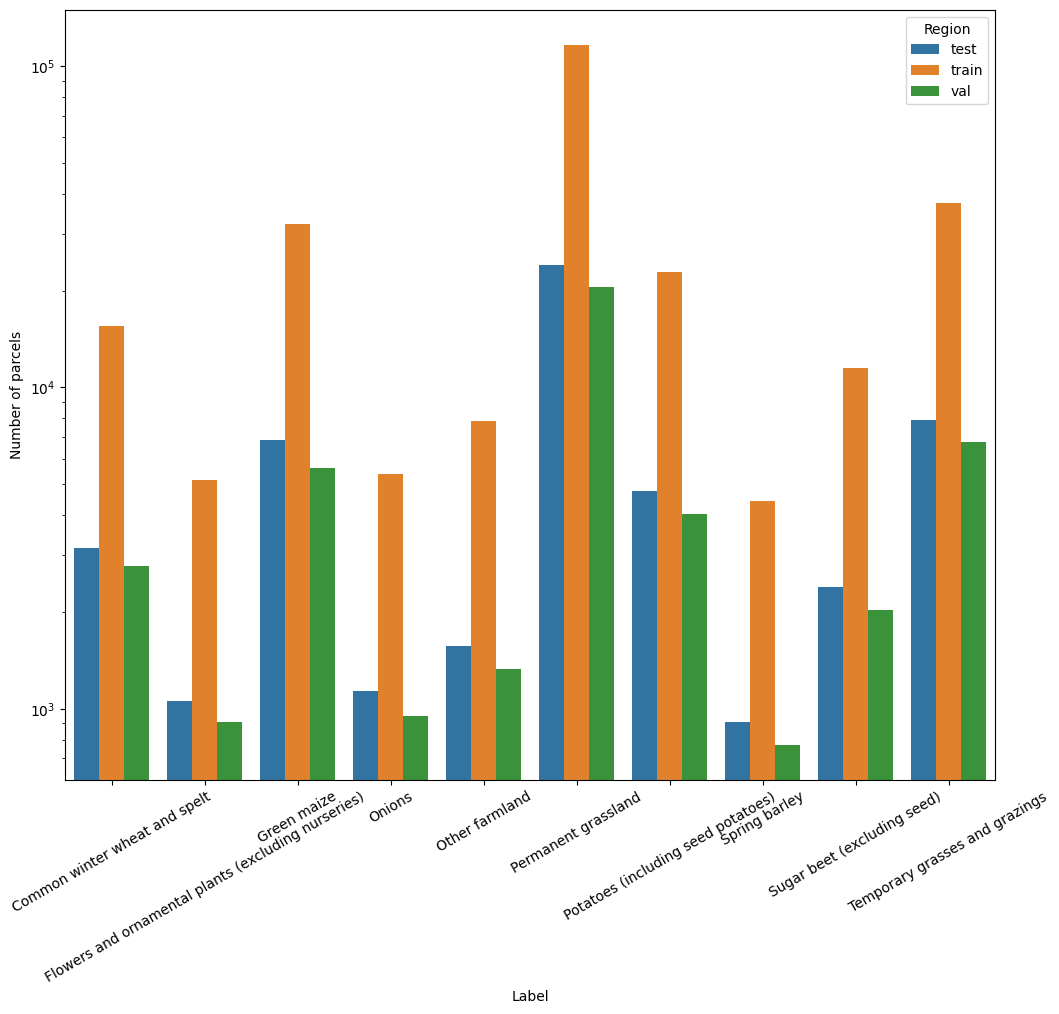

In [12]:
fig = dataset.data_distribution_barchart()

### Load train and validation splits

In [13]:
train_dataset_config = {
    "root": "/home/dkocev/data/CropTypeNetherlands/2019/",
    "csv_file_path": "index.csv",
    "batch_size": 128,
    "shuffle": True,
    "num_workers": 4,
    "regions":["train", ],
}

train_dataset = EOPatchCrops(train_dataset_config)

validation_dataset_config = {
    "batch_size": 32,
    "shuffle": False,
    "num_workers": 4,
    "root": "/home/dkocev/data/CropTypeNetherlands/2019/",
    "csv_file_path": "index.csv",
    "regions":["val", ],
}

validation_dataset = EOPatchCrops(validation_dataset_config)
len(train_dataset), len(validation_dataset)

(258893, 45687)

### Setup and create the model for training

In [14]:
epochs = 100
model_directory = "./experiments/LSTM"
model_config = {
    "input_dim":11,
    "num_classes": 10, 
    "learning_rate": 0.001,
    "dropout" : 0.2,
    "metrics":["accuracy","f1_score", "kappa"]
}
model = LSTM(model_config)
model.prepare()

### Training and validation

In [ ]:
model.train_and_evaluate_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    val_dataset=validation_dataset,
    run_id='notebook-1',
)

### Test the model

In [ ]:
labels = ["Permanent grassland", "Temporary grasses and grazings", "Green maize", "Potatoes (including seed potatoes)", 
          "Common winter wheat and spelt", "Sugar beet (excluding seed)", "Other farmland", "Onions", 
          "Flowers and ornamental plants (excluding nurseries)", "Spring barley",]

test_dataset_config = {
    "batch_size": 32,
    "shuffle": False,
    "num_workers": 4,
    "root": "/home/dkocev/data/CropTypeNetherlands/2019/",
    "csv_file_path": "index.csv",
    "regions":["test", ],
}

test_dataset = EOPatchCrops(test_dataset_config)

model_path = "/home/dkocev/aitlas/experiments/LSTM/checkpoint.pth.tar"
model.metrics = ["accuracy", "f1_score", "kappa"]
model.running_metrics.reset()
model.evaluate(dataset=test_dataset, model_path=model_path)
model.running_metrics.get_scores(model.metrics)

### Running and visualizing predictions

running prediction: 100%|██████████████████████████████████████████████████████████| 1680/1680 [00:10<00:00, 154.19it/s]


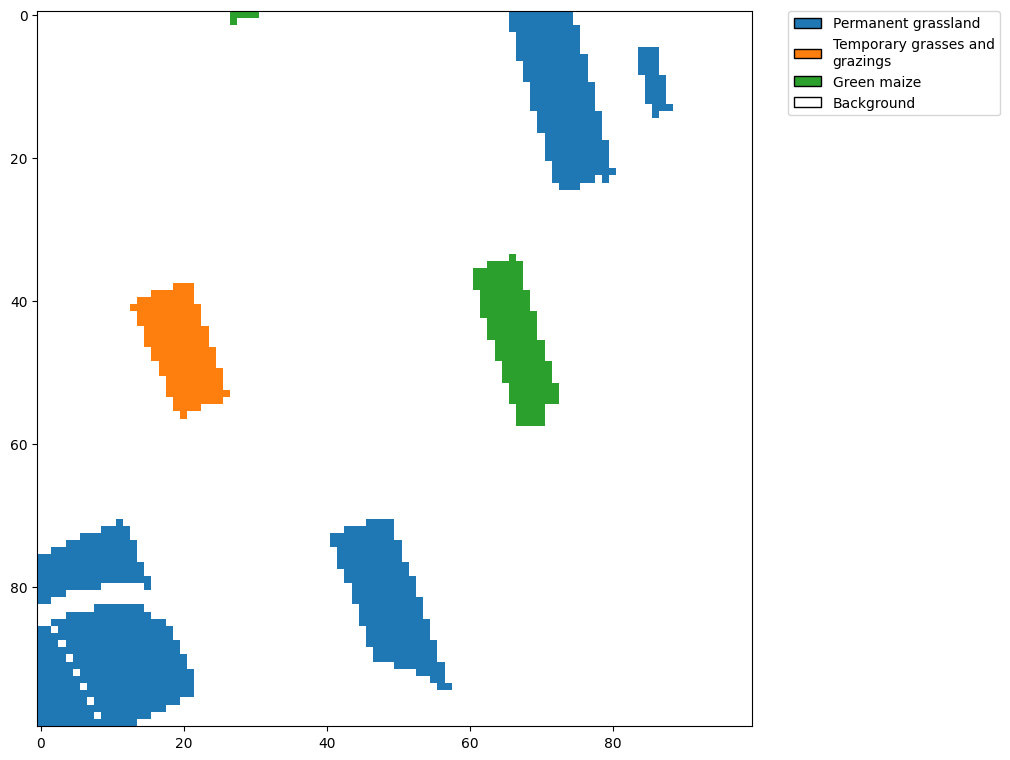

In [25]:
y_true, y_pred, y_prob = model.predict(dataset=test_dataset,)

eopatches_path = "/home/dkocev/data/CropTypeNetherlands/2019/eopatches/"
patch = "eopatch_7495"

fig = display_eopatch_predictions(
    eopatches_path,
    patch,
    y_pred,
    test_dataset.index,
    y_true,
    test_dataset.mapping,
)